In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chess

In [2]:
boards = np.load('../data/processed/boards_packed.npy', mmap_mode='r')
tags = np.load('../data/processed/tags_packed.npy', mmap_mode='r')
tag_names = np.load('../data/processed/tag_classes.npy', allow_pickle=True)

In [3]:
print(f"Loaded Dataset:")
print(f" - Boards: {boards.shape} (Type: {boards.dtype})")
print(f" - Tags:   {tags.shape}   (Type: {tags.dtype})")
print(f" - Classes: {len(tag_names)} tags")

Loaded Dataset:
 - Boards: (2269595, 64) (Type: int8)
 - Tags:   (2269595, 15)   (Type: int8)
 - Classes: 15 tags


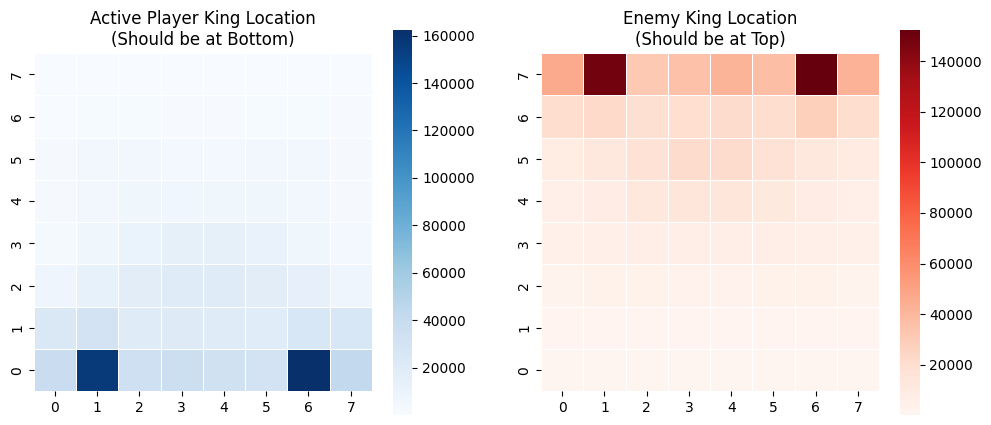

In [4]:
def plot_board_density(boards, sample_size=1_000_000):
    # Randomly sample indices
    indices = np.random.choice(len(boards), size=sample_size, replace=False)
    sample = boards[indices] # Shape (N, 64)
    
    # Initialize 8x8 grids
    # Friendly King is ID 6, Enemy King is ID 12
    friendly_king_map = np.zeros(64)
    enemy_king_map = np.zeros(64)
    
    # Vectorized counting (much faster than loops)
    # Count where board == 6 (Friendly King)
    for i in range(64):
        friendly_king_map[i] = np.sum(sample[:, i] == 6)
        enemy_king_map[i] = np.sum(sample[:, i] == 12)

    # Reshape to 8x8
    fk_grid = friendly_king_map.reshape(8, 8)
    ek_grid = enemy_king_map.reshape(8, 8)

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Friendly King (Active Player)
    sns.heatmap(fk_grid, ax=axes[0], cmap="Blues", linewidths=.5, square=True)
    axes[0].set_title("Active Player King Location\n(Should be at Bottom)")
    axes[0].invert_yaxis() # Rank 1 at bottom
    
    # Enemy King (Opponent)
    sns.heatmap(ek_grid, ax=axes[1], cmap="Reds", linewidths=.5, square=True)
    axes[1].set_title("Enemy King Location\n(Should be at Top)")
    axes[1].invert_yaxis()
    
    plt.show()

plot_board_density(boards)

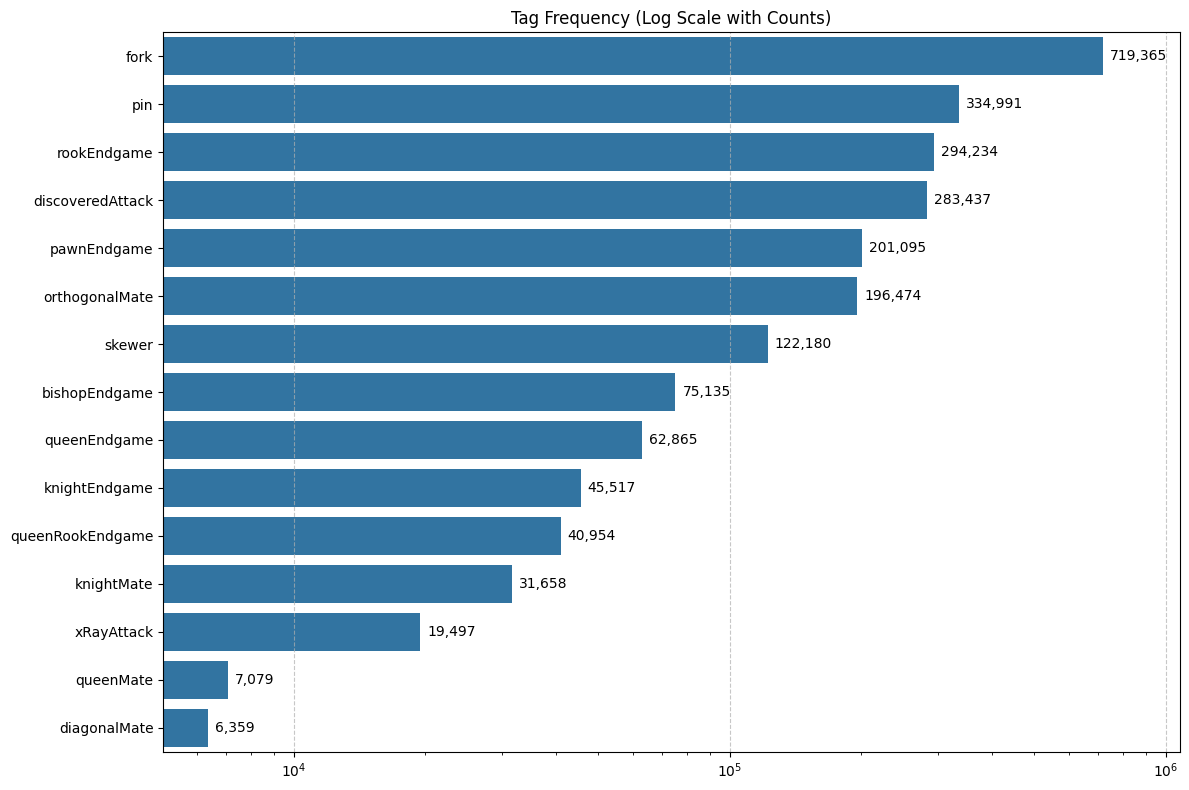

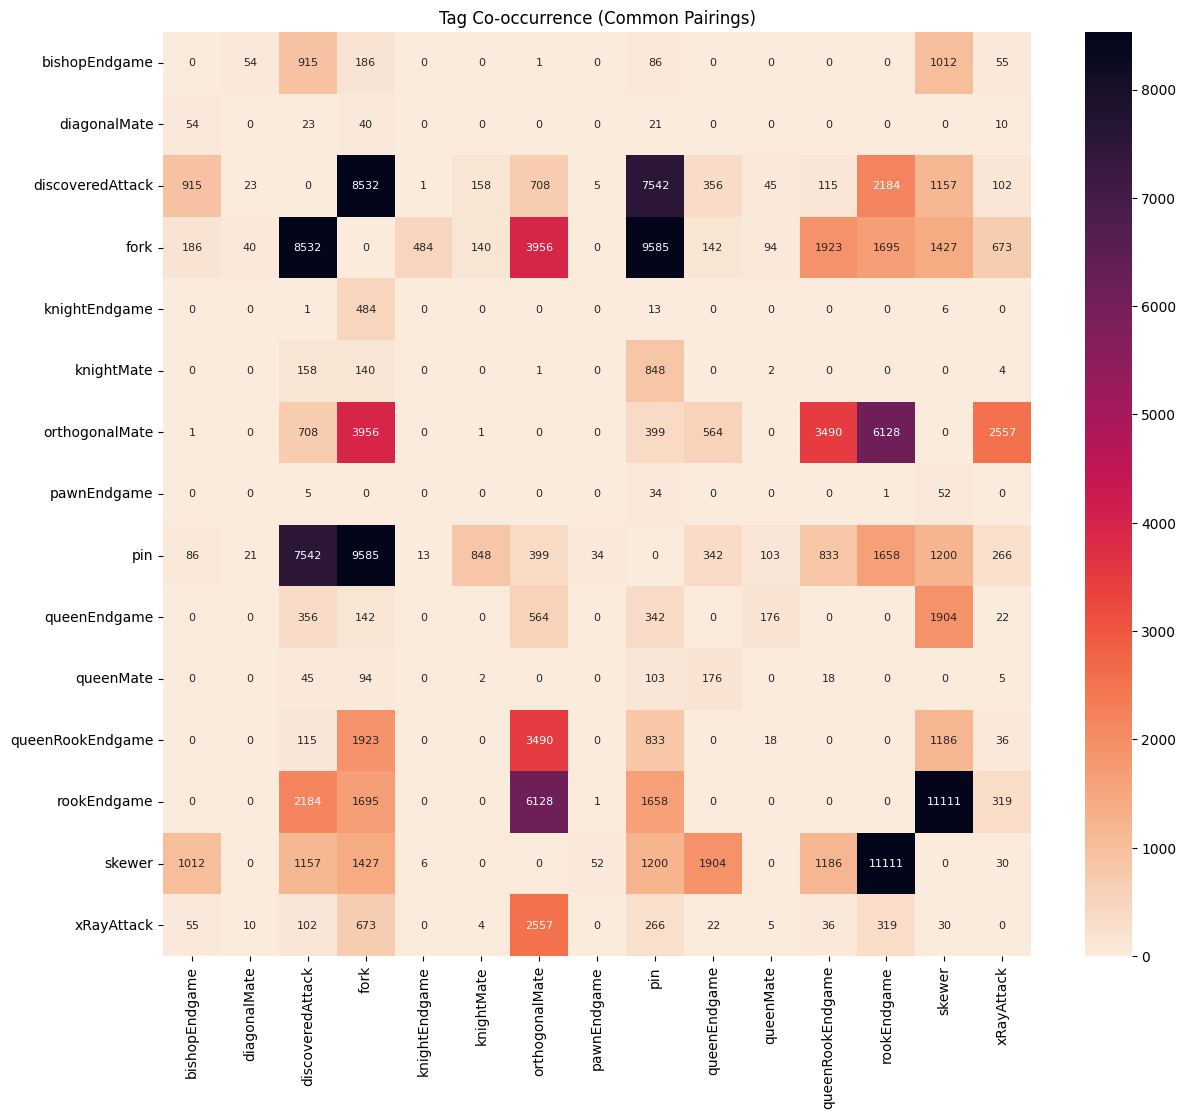

In [5]:
def plot_tag_stats(tags, tag_names):
    # 1. Frequency Calculation
    tag_counts = np.sum(tags, axis=0)
    
    # Sort by frequency
    sorted_indices = np.argsort(tag_counts)[::-1]
    sorted_names = tag_names[sorted_indices]
    sorted_counts = tag_counts[sorted_indices]
    
    # 2. Plotting
    plt.figure(figsize=(12, 8)) # Increased height slightly for readability
    
    # Create the barplot and capture the axes object 'ax'
    ax = sns.barplot(x=sorted_counts, y=sorted_names)
    
    # 3. Add Count Labels
    # fmt='{:,.0f}' adds comma separators (e.g., 1,000)
    # padding=5 adds space between the bar end and the text
    ax.bar_label(ax.containers[0], fmt='{:,.0f}', padding=5, fontsize=10)
    
    plt.xscale('log')
    # Add a little extra space on the right for the labels to fit
    plt.xlim(right=np.max(sorted_counts) * 1.5) 
    
    plt.title("Tag Frequency (Log Scale with Counts)")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # 4. Co-occurrence Matrix (Unchanged)
    subset = tags[:1_000_000].astype(np.float32)
    cooc = np.dot(subset.T, subset)
    np.fill_diagonal(cooc, 0)
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(cooc, xticklabels=tag_names, yticklabels=tag_names, 
                cmap="rocket_r", robust=True, annot=True, fmt='.0f', annot_kws={"size": 8})
    plt.title("Tag Co-occurrence (Common Pairings)")
    plt.show()

# Run it
plot_tag_stats(tags, tag_names)

Sample Index: 383640
Tags: ['bishopEndgame']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 8/pp3pBp/3k4/3Pb3/2K5/5PP1/7P/8 w - - 0 1


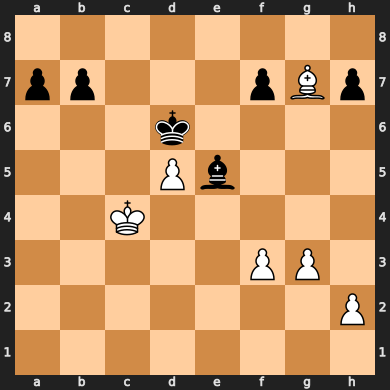

Sample Index: 257678
Tags: ['discoveredAttack']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: r4B2/pp4bk/2n1qpb1/8/2p3N1/2Q5/PP3PP1/R5K1 w - - 0 1


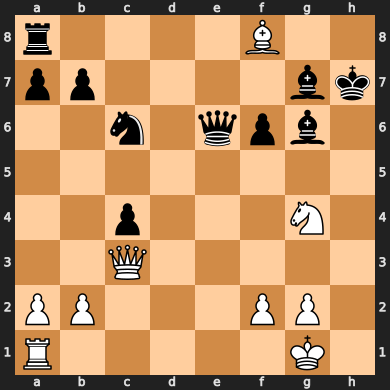

Sample Index: 2011329
Tags: ['rookEndgame']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 8/6p1/5pkp/1R2r3/6KP/5P2/6P1/8 w - - 0 1


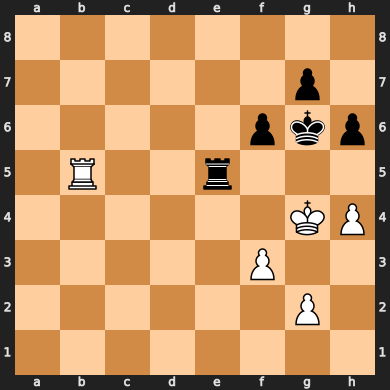

Sample Index: 769060
Tags: ['pin']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 1k2r2r/ppp1qppp/5n2/1B3P2/1R6/2Q1P1P1/2P1K2P/7R w - - 0 1


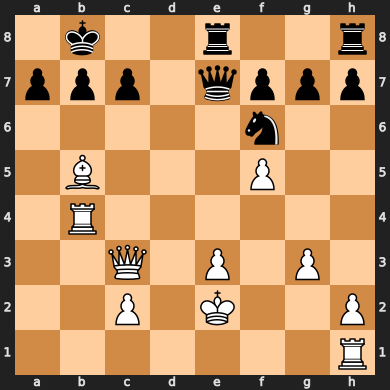

Sample Index: 1960135
Tags: ['orthogonalMate']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 1k5r/pp6/8/1PR1p3/PB1pPqPp/4bP2/2Q3K1/8 w - - 0 1


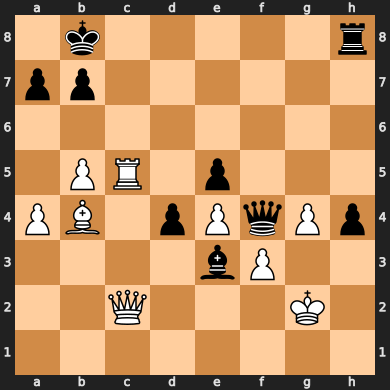

Sample Index: 1507199
Tags: ['discoveredAttack']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: r7/1pk3pp/4pp2/2bp4/q4P2/2B1P2P/1R1QK1P1/rR6 w - - 0 1


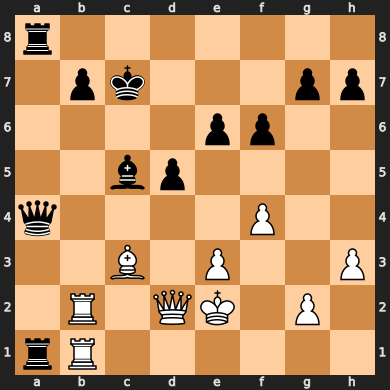

Sample Index: 2253320
Tags: ['pin']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 2r1rk2/BQpbq1pp/4pn2/4Rp2/8/8/PPP2PPP/3R1K2 w - - 0 1


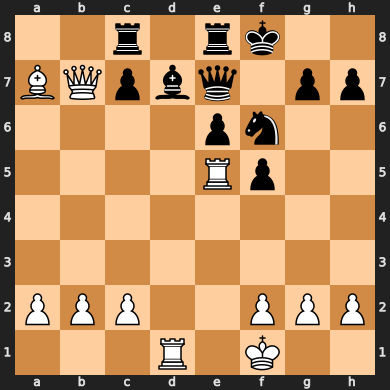

Sample Index: 1281509
Tags: ['fork' 'pin']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 1kr3r1/pp1n1ppp/3q1n2/3p4/2p2P2/1P2P1Q1/PBPPB2P/1KR4R w - - 0 1


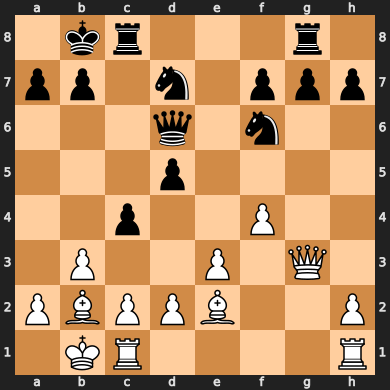

Sample Index: 1508131
Tags: ['pawnEndgame']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 8/8/1p1k1p2/1p1Pp2p/1P2Pp2/4K1PP/8/8 w - - 0 1


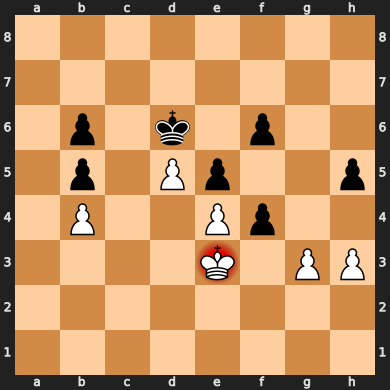

Sample Index: 1272952
Tags: ['queenEndgame']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 8/5p2/Q5p1/1p3k2/P5qp/8/5P1K/8 w - - 0 1


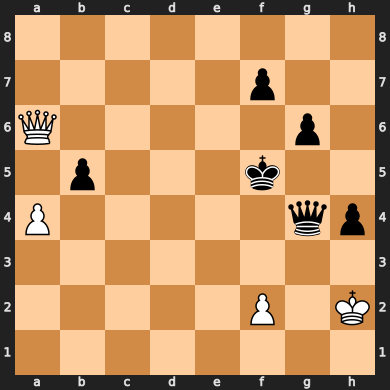

In [ ]:
def inspect_sample(idx):
    # 1. Get Data
    board_data = boards[idx]
    tag_vector = tags[idx]
    
    # 2. Decode Tags
    # indices where vector is 1
    active_indices = np.where(tag_vector == 1)[0]
    current_tags = tag_names[active_indices]
    
    # 3. Render
    board = packed_to_board(board_data)
    
    print(f"Sample Index: {idx}")
    print(f"Tags: {current_tags}")
    print("Note: Visualized in Canonical Orientation (Active Player = White)")
    print(f"FEN: {board.fen()}")
    display(board, size=350)

# Change this number to see different puzzles
for i in np.random.randint(0, len(boards), size=10):
    inspect_sample(i)
# inspect_sample(1123)